In [ ]:
!pip install transformers

In [1]:
import torch
from urllib.request import urlopen
import json
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setup device

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_hf = 0 if torch.cuda.is_available() else -1
print("Device:", device)

Device: cuda


In [3]:
NUM_WORKERS = 0

# Preparing the dataset

In [4]:
fetch_from_web = False

if fetch_from_web:
    url = "https://github.com/gu-sentiment-2021/sent/raw/v211021/summer21/json2csds/data.json"
    response = urlopen(url)
    csds_collection = json.loads(response.read())
else:
    with open('..\\json2csds\\data.json') as file:
        csds_collection = json.load(file)

In [5]:
# Preparing inputs and targets

inputs_text = []
inputs_head = []
inputs_text_head_dot = []
inputs_head_dot_text = []
inputs_text_head = []
inputs_head_text = []
inputs_tuple_text_head = []
inputs_tuple_head_text = []
targets_annotype = []

for csds_object in csds_collection['csds_objects']:
    inputs_text += [csds_object['text']]
    inputs_head += [csds_object['head']]
    inputs_text_head_dot += [csds_object['text'] + ' ' + csds_object['head'] + '.']
    inputs_head_dot_text += [csds_object['head'] + '. ' + csds_object['text']]
    inputs_text_head += [csds_object['text'] + ' ' + csds_object['head']]
    inputs_head_text += [csds_object['head'] + ' ' + csds_object['text']]
    inputs_tuple_text_head += [(csds_object['text'], csds_object['head'])]
    inputs_tuple_head_text += [(csds_object['head'], csds_object['text'])]
    targets_annotype += [csds_object['annotation_type'].replace('_', ' ')] # "expressive_subjectivity" -> "expressive subjectivity"

n_samples = len(csds_collection['csds_objects'])

i = 128
print(f'inputs and targets for {i+1}-th csds object (out of {n_samples}):')
print('inputs_text:\t\t', inputs_text[i])
print('inputs_head:\t\t', inputs_head[i])
print('inputs_text_head_dot:\t', inputs_text_head_dot[i])
print('inputs_head_dot_text:\t', inputs_head_dot_text[i])
print('inputs_text_head:\t', inputs_text_head[i])
print('inputs_head_text:\t', inputs_head_text[i])
print('inputs_tuple_text_head:\t', inputs_tuple_text_head[i])
print('inputs_tuple_head_text:\t', inputs_tuple_head_text[i])
print('targets_annotype:\t', targets_annotype[i])

inputs and targets for 129-th csds object (out of 4384):
inputs_text:		 Many fear violence after Zimbabwe vote
inputs_head:		 fear
inputs_text_head_dot:	 Many fear violence after Zimbabwe vote fear.
inputs_head_dot_text:	 fear. Many fear violence after Zimbabwe vote
inputs_text_head:	 Many fear violence after Zimbabwe vote fear
inputs_head_text:	 fear Many fear violence after Zimbabwe vote
inputs_tuple_text_head:	 ('Many fear violence after Zimbabwe vote', 'fear')
inputs_tuple_head_text:	 ('fear', 'Many fear violence after Zimbabwe vote')
targets_annotype:	 sentiment


In [6]:
# Count the number of each annotation type and extract the labels

annotype_n = {}
for annotype in targets_annotype:
    annotype_n[annotype] = annotype_n.get(annotype, 0) + 1
print(annotype_n)
classes = list(annotype_n.keys())

{'expressive subjectivity': 1811, 'sentiment': 1290, 'arguing': 821, 'other attitude': 203, 'intention': 132, 'speculation': 53, 'agreement': 74}


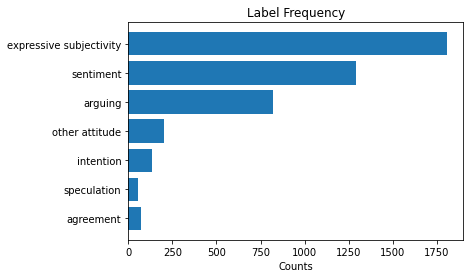

In [7]:
# Plot the chart

fig, ax = plt.subplots()

ax.barh(np.arange(len(classes)), list(annotype_n.values()))
ax.set_yticks(np.arange(len(classes)))
ax.set_yticklabels(classes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Counts')
ax.set_title('Label Frequency')

plt.show()

# Preparing the metrics

In [ ]:
# Accuracy

def accuracy(results, targets):
    correct = 0
    n = len(targets)
    for result, target in zip(results, targets):
        if result['labels'][0] == target:
            correct += 1
    return correct / n

In [ ]:
sample_start = 0
sample_end = n_samples

# Choose a model

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="typeform/distilbert-base-uncased-mnli",
    device=-1
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="joeddav/bart-large-mnli-yahoo-answers",
    device=device_hf
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="typeform/mobilebert-uncased-mnli",
    device=device_hf,
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="cross-encoder/nli-distilroberta-base",
    device=device_hf,
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="Narsil/deberta-large-mnli-zero-cls",
    device=device_hf,
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="cross-encoder/nli-roberta-base",
    device=device_hf,
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="cross-encoder/nli-deberta-base",
    device=device_hf,
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="cross-encoder/nli-MiniLM2-L6-H768",
    device=device_hf,
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="typeform/squeezebert-mnli",
    device=device_hf,
)

In [ ]:
classifier = pipeline(
    "zero-shot-classification",
    model="navteca/bart-large-mnli",
    device=device_hf,
)

# Evaluate

## inputs_text

In [ ]:
results = classifier(inputs_text[sample_start:sample_end], classes, num_workers=NUM_WORKERS, truncation=True, padding=True)

In [ ]:
print("Accuracy:", accuracy(results, targets_annotype[sample_start:sample_end]))

<span style="color:green">**typeform/distilbert-base-uncased-mnli**</span> <br/>
Accuracy: 0.1644616788321168

<span style="color:green">**joeddav/bart-large-mnli-yahoo-answers**</span> <br/>
Accuracy: 0.1781478102189781

<span style="color:green">**typeform/mobilebert-uncased-mnli**</span> <br/>
Accuracy: 0.12203467153284671

<span style="color:green">**cross-encoder/nli-distilroberta-base**</span> <br/>
Accuracy: 0.19936131386861314

<span style="color:green">**Narsil/deberta-large-mnli-zero-cls**</span> <br/>
Accuracy: 0.21829379562043796 (2)

<span style="color:green">**cross-encoder/nli-roberta-base**</span> <br/>
Accuracy: 0.1906934306569343

<span style="color:green">**cross-encoder/nli-deberta-base**</span> <br/>
Accuracy: 0.30383211678832117 (1)

<span style="color:green">**cross-encoder/nli-MiniLM2-L6-H768**</span> <br/>
Accuracy: 0.21099452554744524 (3)

<span style="color:green">**typeform/squeezebert-mnli**</span> <br/>
Accuracy: 0.09146897810218978

<span style="color:green">**navteca/bart-large-mnli**</span> <br/>
Accuracy: 0.1646897810218978

## inputs_head

In [ ]:
results = classifier(inputs_head[sample_start:sample_end], classes, num_workers=NUM_WORKERS, truncation=True, padding=True)

In [ ]:
print("Accuracy:", accuracy(results, targets_annotype[sample_start:sample_end]))

<span style="color:green">**typeform/distilbert-base-uncased-mnli**</span> <br/>
Accuracy: 0.22239963503649635

<span style="color:green">**joeddav/bart-large-mnli-yahoo-answers**</span> <br/>
Accuracy: 0.36199817518248173 (1)

<span style="color:green">**typeform/mobilebert-uncased-mnli**</span> <br/>
Accuracy: 0.18088503649635038

<span style="color:green">**cross-encoder/nli-distilroberta-base**</span> <br/>
Accuracy: 0.24657846715328466

<span style="color:green">**Narsil/deberta-large-mnli-zero-cls**</span> <br/>
Accuracy: 0.20369525547445255

<span style="color:green">**cross-encoder/nli-roberta-base**</span> <br/>
Accuracy: 0.23882299270072993

<span style="color:green">**cross-encoder/nli-deberta-base**</span> <br/>
Accuracy: 0.2732664233576642 (3)

<span style="color:green">**cross-encoder/nli-MiniLM2-L6-H768**</span> <br/>
Accuracy: 0.28558394160583944 (2)

<span style="color:green">**typeform/squeezebert-mnli**</span> <br/>
Accuracy: 0.06113138686131387

<span style="color:green">**navteca/bart-large-mnli**</span> <br/>
Accuracy: 0.21920620437956204

## inputs_text_head_dot

In [ ]:
results = classifier(inputs_text_head_dot[sample_start:sample_end], classes, num_workers=NUM_WORKERS, truncation=True, padding=True)

In [ ]:
print("Accuracy:", accuracy(results, targets_annotype[sample_start:sample_end]))

<span style="color:green">**typeform/distilbert-base-uncased-mnli**</span> <br/>
Accuracy: 0.16833941605839417

<span style="color:green">**joeddav/bart-large-mnli-yahoo-answers**</span> <br/>
Accuracy: 0.19046532846715328

## inputs_head_dot_text

In [ ]:
results = classifier(inputs_head_dot_text[sample_start:sample_end], classes, num_workers=NUM_WORKERS, truncation=True, padding=True)

In [ ]:
print("Accuracy:", accuracy(results, targets_annotype[sample_start:sample_end]))

<span style="color:green">**typeform/distilbert-base-uncased-mnli**</span> <br/>
Accuracy: 0.18225364963503649

<span style="color:green">**joeddav/bart-large-mnli-yahoo-answers**</span> <br/>
Accuracy: 0.1968521897810219